In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv('preprocessed_data2.csv')


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


In [4]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [5]:
model = LogisticRegression(random_state=42)
model.fit(X_train_vectorized, y_train)


LogisticRegression(random_state=42)

In [6]:
y_pred = model.predict(X_test_vectorized)
accuracy_score(y_test, y_pred)


0.9137

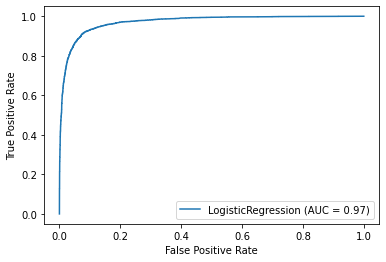

In [8]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test_vectorized, y_test)

In [9]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

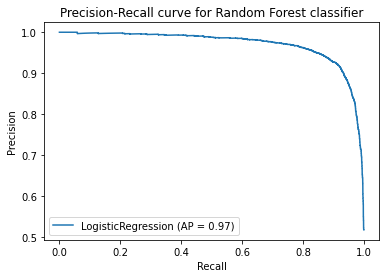

In [10]:
# Plot the precision-recall curve
plot_precision_recall_curve(model, X_test_vectorized, y_test)

# Visualize the plot
plt.title('Precision-Recall curve for Logistic regeression classifier')
plt.show()


In [7]:
recall_score(y_test, y_pred)

0.897047086991221

In [37]:
precision_score(y_test, y_pred)

0.9283501961594053

In [38]:
f1_score(y_test, y_pred)

0.9124302384576357

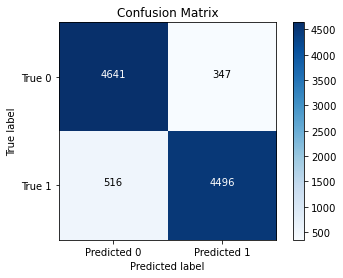

In [8]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add numbers to the squares
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()


In [9]:
sample="just because Im sad doesnt mean that I am suicidal"
print(model.predict(vectorizer.transform([sample]))[0])

0


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

c:\Users\raish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\raish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\raish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\raish\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\raish\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\raish\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch,

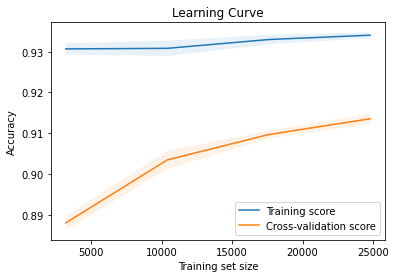

In [15]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_vectorized, y_train, cv=5)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()
